In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
intensities = loadmat('I.mat')
cingulate_gradients = loadmat('./cingulate_gradients.mat')
cingulate_gradients = cingulate_gradients['cingulate_gradients']
cingulate_gradients = cingulate_gradients.transpose()



cingulate_map_raw = [41,123,270,271,272,273,274,276,277,278,371,372,428,435,443,467,469,470,471,473,476,477,479,481,482,484,485,486,487,490,492,626,792,793,794,796,797,798,799,800,908,909,958,961,963,982,983,986,988,991,992,993,994,999,1000]
cingulate_map = [i-1 for i in cingulate_map_raw]

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep  2 11:50:56 2021', '__version__': '1.0', '__globals__': [], 'I2': array([[[1.64604127, 1.63260001, 1.61987459, ..., 1.47287687,
         1.4954014 , 1.51010562],
        [1.66027128, 1.67148199, 1.68823119, ..., 1.62144662,
         1.6209732 , 1.62100636],
        [1.68649555, 1.71144144, 1.75473789, ..., 1.73423603,
         1.72287077, 1.70756065],
        ...,
        [1.94745435, 1.99028879, 2.09989978, ..., 2.12163778,
         2.13650972, 2.05090393],
        [2.09025807, 2.12272982, 2.24280314, ..., 2.25082918,
         2.28435278, 2.19275789],
        [2.33867204, 2.35600568, 2.46285779, ..., 2.45234364,
         2.48294475, 2.38285777]],

       [[1.54153771, 1.40951651, 1.51692289, ..., 1.32598765,
         1.29852789, 1.37257177],
        [1.55929417, 1.49006963, 1.59260077, ..., 1.48879498,
         1.38641822, 1.45739542],
        [1.59062773, 1.55423   , 1.6662847 , ..., 1.59688497,
         1.48

In [20]:
G1 = pd.DataFrame(cingulate_gradients[0], index=cingulate_map)


In [51]:
intensities_1000_sub1 = pd.DataFrame(intensities['I2'][0])
intensities_1000_sub2 = pd.DataFrame(intensities['I2'][1])
intensities_1000_sub3 = pd.DataFrame(intensities['I2'][2])
allsubject_inten_concat = pd.concat([intensities_1000_sub1, intensities_1000_sub2, intensities_1000_sub3])
by_row_index = allsubject_inten_concat.groupby(allsubject_inten_concat.index)
allsubject_inten_mean = by_row_index.mean()
intensities_cingulate = allsubject_inten_mean.iloc[:,cingulate_map]


qc_G1=pd.qcut(G1[0], q=14, precision=1) # cuts data into 12 bins with equally numbered data points
bins_G1 = qc_G1.cat.categories
codes_G1 = qc_G1.cat.codes

df_G1 = pd.concat([G1,codes_G1], axis=1)
df_G1.columns = ["gradient_intensity", "bin"]
df_G1['region'] = ''
df_G1.region[df_G1['bin']<=4] = 'anterior'
df_G1.region[(df_G1['bin']>4) & (df_G1['bin']<8)] = 'intermediate'
df_G1.region[df_G1['bin']>=8] = 'posterior'

df_G1["wm_intensity_mean"] = intensities_cingulate.mean().transpose()
df_G1["wm_intensity_std"] = intensities_cingulate.std().transpose()
df_G1["wm_intensity_skew"] = intensities_cingulate.skew().transpose()
df_G1["wm_intensity_kurtosis"] = intensities_cingulate.kurtosis().transpose()

intensities_trans = intensities_cingulate.transpose()
surf_intensities_merge = pd.concat([intensities_trans, df_G1['region']], axis=1)
anterior_inten = surf_intensities_merge[surf_intensities_merge['region'] == 'anterior']
posterior_inten = surf_intensities_merge[surf_intensities_merge['region'] == 'posterior']
intermediate_inten = surf_intensities_merge[surf_intensities_merge['region'] == 'intermediate']

regional_inten = pd.DataFrame([anterior_inten.mean(), posterior_inten.mean(), intermediate_inten.mean()], index=['anterior', 'posterior', 'intermediate'])
regional_inten_trans = regional_inten.transpose()
regional_inten_trans.reset_index(inplace=True)
regional_inten_trans = regional_inten_trans.rename(columns = {'index':'surface'})


/var/folders/w3/80xb185904n9527_z14hcsh00000gn/T/ipykernel_71073/1778145797.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_G1.region[df_G1['bin']<=4] = 'anterior'
/var/folders/w3/80xb185904n9527_z14hcsh00000gn/T/ipykernel_71073/1778145797.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_G1.region[(df_G1['bin']>4) & (df_G1['bin']<9)] = 'intermediate'
/var/folders/w3/80xb185904n9527_z14hcsh00000gn/T/ipykernel_71073/1778145797.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

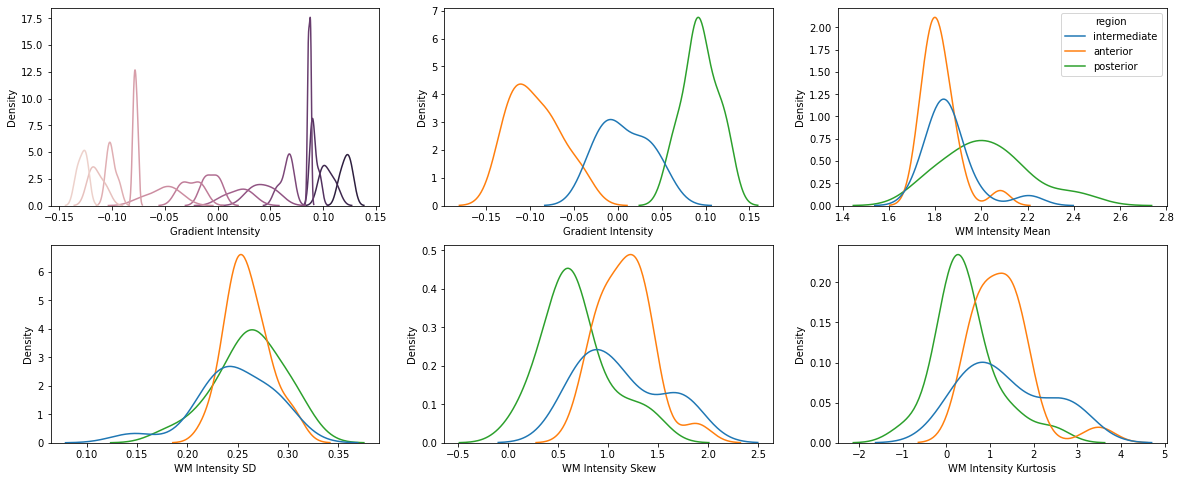

In [52]:
fig, axes = plt.subplots(2,3, figsize=(20,8))
sns.kdeplot(ax=axes[0,0], data=df_G1, x="gradient_intensity", hue='bin')
axes[0,0].set_xlabel("Gradient Intensity")
axes[0,0].legend_ = None
sns.kdeplot(ax=axes[0,1], data=df_G1, x="gradient_intensity", hue='region')
axes[0,1].set_xlabel("Gradient Intensity")
axes[0,1].legend_ = None
sns.kdeplot(ax=axes[0,2], data=df_G1, x="wm_intensity_mean", hue='region')
axes[0,2].set_xlabel("WM Intensity Mean")
sns.kdeplot(ax=axes[1,0], data=df_G1, x="wm_intensity_std", hue='region')
axes[1,0].set_xlabel("WM Intensity SD")
axes[1,0].legend_ = None
sns.kdeplot(ax=axes[1,1], data=df_G1, x="wm_intensity_skew", hue='region')
axes[1,1].set_xlabel("WM Intensity Skew")
axes[1,1].legend_ = None
sns.kdeplot(ax=axes[1,2], data=df_G1, x="wm_intensity_kurtosis", hue='region')
axes[1,2].set_xlabel("WM Intensity Kurtosis")
axes[1,2].legend_ = None

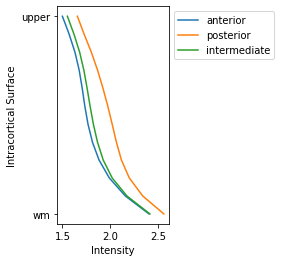

In [53]:
fig = plt.figure(figsize=(2,4))
ax1= sns.lineplot(x=regional_inten_trans['anterior'], y=regional_inten_trans['surface'])
ax1= sns.lineplot(x=regional_inten_trans['posterior'], y=regional_inten_trans['surface'])
ax1= sns.lineplot(x=regional_inten_trans['intermediate'], y=regional_inten_trans['surface'])
ax1.invert_yaxis()
ax1.set_xlabel('Intensity')
ax1.set_ylabel('Intracortical Surface')
ax1.set_yticks([0,11])
ax1.set_yticklabels(["upper", "wm"])
ax1.legend(['anterior', 'posterior', 'intermediate'],bbox_to_anchor=(1,1), loc="upper left")

